# **Import Library**

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('ulasan_alquran_indonesia.csv', quotechar='"')
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a72320e9-7ca4-4452-a7c5-ea7bd9ad3430,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sudah bagus banget! Cuman gatau ng...,5,329,3.0.18,2025-01-02 04:03:10,"Assalamu'alaikum,\nTerima kasih telah mengguna...",2025-01-02 05:01:06,3.0.18
1,9113f417-967b-4c01-8453-1960cebaed9e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sbnrnya instal app ini sdh lama, sdh bbrp thn....",5,394,3.0.18,2024-12-30 21:35:19,NaN,NaN,3.0.18
2,ea785bf1-3cff-452e-be02-c92600613625,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf. Akhir-akhir ini jadual sholat otomatis m...,2,20,3.0.18,2025-01-19 05:05:27,"Assalamu'alaikum, Edsar.\nTerima kasih sudah m...",2024-03-02 11:08:28,3.0.18
3,892c1bf7-5922-451d-a9cb-9e747f9757d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Trimakasih Aplikasi yg sangat bagus.terjemahan...,4,14,3.0.18,2025-01-04 06:20:14,NaN,NaN,3.0.18
4,5e38686e-6622-43f6-8c44-afe8c42ad187,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,memang kalau di suruh cari kiblat di tempat la...,5,13,3.0.18,2025-01-12 06:05:13,NaN,NaN,3.0.18
...,...,...,...,...,...,...,...,...,...,...,...
103495,508e0c7f-0bb2-4667-b6a2-516dceb7ff1d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus, terima kasih semoga Allah memberkahi ki...",5,0,2.7.01,2021-08-30 22:19:28,"Assalamu'alaikum, M Ridhwan.\nTerima kasih sud...",2021-08-31 05:57:40,2.7.01
103496,4e2ce2f6-fee7-4265-8d38-63143528aa11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suara azan tidak berbunyi,1,0,2.6.69,2020-06-18 11:22:20,NaN,NaN,2.6.69
103497,603bbd64-e5d9-4fd6-bb77-cb3a2963efe3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ALHAMDULILLAH mebantu aku,anak"" & istri ku mem...",5,0,2.6.25,2018-12-23 17:06:05,NaN,NaN,2.6.25
103498,67736db3-8551-4f67-ab74-627924e60605,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sagat bnyak mampahatnya untk menambah ilmu,5,0,NaN,2020-02-16 07:41:23,NaN,NaN,NaN


In [ ]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a72320e9-7ca4-4452-a7c5-ea7bd9ad3430,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sudah bagus banget! Cuman gatau ng...,5,329,3.0.18,2025-01-02 04:03:10,"Assalamu'alaikum,\nTerima kasih telah mengguna...",2025-01-02 05:01:06,3.0.18
1,9113f417-967b-4c01-8453-1960cebaed9e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sbnrnya instal app ini sdh lama, sdh bbrp thn....",5,394,3.0.18,2024-12-30 21:35:19,NaN,NaN,3.0.18
2,ea785bf1-3cff-452e-be02-c92600613625,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf. Akhir-akhir ini jadual sholat otomatis m...,2,20,3.0.18,2025-01-19 05:05:27,"Assalamu'alaikum, Edsar.\nTerima kasih sudah m...",2024-03-02 11:08:28,3.0.18
3,892c1bf7-5922-451d-a9cb-9e747f9757d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Trimakasih Aplikasi yg sangat bagus.terjemahan...,4,14,3.0.18,2025-01-04 06:20:14,NaN,NaN,3.0.18
4,5e38686e-6622-43f6-8c44-afe8c42ad187,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,memang kalau di suruh cari kiblat di tempat la...,5,13,3.0.18,2025-01-12 06:05:13,NaN,NaN,3.0.18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103500 entries, 0 to 103499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              103500 non-null  object
 1   userName              103500 non-null  object
 2   userImage             103500 non-null  object
 3   content               103500 non-null  object
 4   score                 103500 non-null  int64 
 5   thumbsUpCount         103500 non-null  int64 
 6   reviewCreatedVersion  86530 non-null   object
 7   at                    103500 non-null  object
 8   replyContent          50817 non-null   object
 9   repliedAt             50817 non-null   object
 10  appVersion            86530 non-null   object
dtypes: int64(2), object(9)
memory usage: 8.7+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = data.dropna()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42746 entries, 0 to 103495
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              42746 non-null  object
 1   userName              42746 non-null  object
 2   userImage             42746 non-null  object
 3   content               42746 non-null  object
 4   score                 42746 non-null  int64 
 5   thumbsUpCount         42746 non-null  int64 
 6   reviewCreatedVersion  42746 non-null  object
 7   at                    42746 non-null  object
 8   replyContent          42746 non-null  object
 9   repliedAt             42746 non-null  object
 10  appVersion            42746 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.9+ MB


In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## **Preprocessing**

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghilangkan mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghilangkan hashtag
    text = re.sub(r'RT[\s]', '', text) # menghilangkan RT
    text = re.sub(r"http\S+", '', text) # menghilangkan link
    text = re.sub(r'[0-9]+', '', text) # menghilangkan numbers
    text = re.sub(r'[^\w\s]', '', text) # menghilangkan numbers


    text = text.replace('\n', ' ') # mengganti baris baru menjadi spasi.
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca.
    text = text.strip(' ') # menghapus spasi karakter di kedua sisi kiri dan kanan teks.
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil.
    text = text.lower()
    return text

def tokenizingText(text): # Membagi atau memisahkan string, teks menjadi daftar token.
    text = word_tokenize(text)
    return text

def filteringText(text): # menghapus kata stopwords dalam teks.
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","yah","deh", "eh", "nihh", "al", "mn", "g", "dnk", "mas", "nyah", "ngeinep", "wr", "bang", "bc", "ko"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi sebuah kata ke akar katanya yang melekat pada sufiks dan prefiks atau ke akar kata.
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat.
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "jadual": "jadwal", "aplikasinya": "aplikasi", "Akhir-akhir": "akhir akhir", "sngat": "sangat", "alhamdulilah": "alhamdulillah", "gatau": "tidak tahu", "diperbaikin": "diperbaiki", "berfungsil": "berfungsi", "aamiin": "amin", "udh": "sudah", "trimakasih": "terima kasih", "ngaji": "mengaji", "apk": "aplikasi", "prakti": "praktis", "quran": "alquran", "bagu": "bagus", "pakai": "memakai", "terimakasih": "terima kasih", "app": "aplikasi", "baca": "membaca", "hp": "handphone", "bacaaan": "bacaan", "pilih": "memilih", "bertahuntahun": "bertahun tahun", "ngak": "tidak", "jafi": "jadi", "make": "memakai", "membantuu": "membantu", "dgn": "dengan", "cuman": "hanya", "ngapa": "mengapa", "putarputar": "memutar", "al": "al quran", "pindahpindah": "memindah", "riweh": "ribet", "engga": "tidak", "tambahin": "tambahi", "seneng": "senang", "gk": "tidak", "gitu": "begitu", "pas": "ketika", "enakan": "lebih enak", "apus": "hapus", "inii": "ini", "hapal": "hafal", "tetep": "tetap", "pasangin": "pasangkan", "sukaa": "suka", "ttapi": "tetapi", "saranin": "sarankan", "menghapalkan": "menghafalkan", "hatam": "khatam", "biar": "agar", "dlm": "dalam", "kemana": "ke mana", "saad": "saat", "nyalain": "menyalakan", "alloh": "allah", "gabisa": "tidak bisa", "wilayahpun": "wilayah pun", "set": "pengaturan", "sebenernya": "sebenarnya", "ngunduh": "mengunduh", "mksh": "terima kasih", "slalu": "selalu", "kurangin": "mengurangi", "watshap": "whatssapp", "yauda": "baiklah", "gituu": "begitu", "ngikutin": "mengikuti", "apalin": "menghafalkan", "makasiii": "terima kasih", "nuga": "juga", "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "Akhirakhir": "akhir akhir", "azannotifikasi": "azan", "denger": "mendengar", "bantu": "membantu", "dg": "dengan", "diinginkanmisal": "diharapkan", "alqur": "alquran", "disitu": "di sana", "dllpokoknya": "pokoknya", "sarankan": "menyarankan", "baguskarna": "bagus"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a72320e9-7ca4-4452-a7c5-ea7bd9ad3430,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sudah bagus banget! Cuman gatau ng...,5,329,3.0.18,2025-01-02 04:03:10,"Assalamu'alaikum,\nTerima kasih telah mengguna...",2025-01-02 05:01:06,3.0.18
2,ea785bf1-3cff-452e-be02-c92600613625,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf. Akhir-akhir ini jadual sholat otomatis m...,2,20,3.0.18,2025-01-19 05:05:27,"Assalamu'alaikum, Edsar.\nTerima kasih sudah m...",2024-03-02 11:08:28,3.0.18
5,7d73041f-609c-4773-93db-90eaacee2b8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus dan membantu banget, udah be...",5,62,3.0.18,2025-01-02 12:26:40,"Assalamu'alaikum, Haura.\nTerima kasih telah m...",2025-01-03 03:52:17,3.0.18
6,d2786992-4da3-4c50-b739-be740fe7c86e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Suatu aplikasi yg sangat baik dan bagus, karen...",5,9,3.0.18,2025-01-07 02:21:58,"Assalamu'alaikum, Muchamad.\nTerima kasih tela...",2025-01-07 04:04:40,3.0.18
7,3e0bed44-1811-4909-b077-e4fe75285f86,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sudah menggunakan aplikasi ini dalam wakt...,4,46,3.0.16,2024-12-15 08:18:19,"Assalamu'alaikum, Teguh Tri.\nTerima kasih tel...",2024-12-16 03:34:35,3.0.16
...,...,...,...,...,...,...,...,...,...,...,...
103484,8a2f493e-5a72-4f77-8eac-f06502cb72d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suka dgn aplikasi ini... 🥰,5,0,3.0.05,2024-07-26 05:54:14,"Assalamu'alaikum, Helya Paat.\nTerima kasih te...",2024-07-26 06:20:19,3.0.05
103486,d9406079-a476-400b-979a-6d17ff26e218,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu sekali,5,0,2.7.46,2023-04-18 07:50:57,"Assalamu'alaikum, Jevano.\nTerima kasih sudah ...",2023-04-18 08:20:39,2.7.46
103488,813e3170-6b50-47b5-bc72-ef054faadbef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya mantap sngat membantuu,5,0,2.7.05,2021-12-21 21:19:47,"Assalamu'alaikum, Munzir Pochers.\nTerima kasi...",2021-12-22 07:10:28,2.7.05
103491,73284f18-d073-4f70-ae60-c472bf26e7db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah sangat bagus,5,0,2.7.09,2022-04-19 05:13:38,"Assalamu'alaikum, Abdul Rahim.\nTerima kasih s...",2022-04-20 07:27:43,2.7.09


In [ ]:
import nltk
nltk.download('punkt_tab')

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,a72320e9-7ca4-4452-a7c5-ea7bd9ad3430,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sudah bagus banget! Cuman gatau ng...,5,329,3.0.18,2025-01-02 04:03:10,"Assalamu'alaikum,\nTerima kasih telah mengguna...",2025-01-02 05:01:06,3.0.18,Aplikasinya sudah bagus banget Cuman gatau nga...,aplikasinya sudah bagus banget cuman gatau nga...,aplikasi sudah bagus banget hanya tidak tahu m...,"[aplikasi, sudah, bagus, banget, hanya, tidak,...","[aplikasi, bagus, banget, handphone, lihat, ar...",aplikasi bagus banget handphone lihat arah kib...
2,ea785bf1-3cff-452e-be02-c92600613625,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf. Akhir-akhir ini jadual sholat otomatis m...,2,20,3.0.18,2025-01-19 05:05:27,"Assalamu'alaikum, Edsar.\nTerima kasih sudah m...",2024-03-02 11:08:28,3.0.18,Maaf Akhirakhir ini jadual sholat otomatis mau...,maaf akhirakhir ini jadual sholat otomatis mau...,maaf akhirakhir ini jadwal sholat otomatis mau...,"[maaf, akhirakhir, ini, jadwal, sholat, otomat...","[maaf, akhirakhir, jadwal, sholat, otomatis, m...",maaf akhirakhir jadwal sholat otomatis manual ...
5,7d73041f-609c-4773-93db-90eaacee2b8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus dan membantu banget, udah be...",5,62,3.0.18,2025-01-02 12:26:40,"Assalamu'alaikum, Haura.\nTerima kasih telah m...",2025-01-03 03:52:17,3.0.18,Aplikasinya bagus dan membantu banget udah ber...,aplikasinya bagus dan membantu banget udah ber...,aplikasi bagus dan membantu banget sudah berap...,"[aplikasi, bagus, dan, membantu, banget, sudah...","[aplikasi, bagus, membantu, banget, kali, gant...",aplikasi bagus membantu banget kali ganti hand...
6,d2786992-4da3-4c50-b739-be740fe7c86e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Suatu aplikasi yg sangat baik dan bagus, karen...",5,9,3.0.18,2025-01-07 02:21:58,"Assalamu'alaikum, Muchamad.\nTerima kasih tela...",2025-01-07 04:04:40,3.0.18,Suatu aplikasi yg sangat baik dan bagus karena...,suatu aplikasi yg sangat baik dan bagus karena...,suatu aplikasi yang sangat baik dan bagus kare...,"[suatu, aplikasi, yang, sangat, baik, dan, bag...","[aplikasi, bagus, didalamnya, aplikasi, kebutu...",aplikasi bagus didalamnya aplikasi kebutuhan s...
7,3e0bed44-1811-4909-b077-e4fe75285f86,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sudah menggunakan aplikasi ini dalam wakt...,4,46,3.0.16,2024-12-15 08:18:19,"Assalamu'alaikum, Teguh Tri.\nTerima kasih tel...",2024-12-16 03:34:35,3.0.16,Saya sudah menggunakan aplikasi ini dalam wakt...,saya sudah menggunakan aplikasi ini dalam wakt...,saya sudah menggunakan aplikasi ini dalam wakt...,"[saya, sudah, menggunakan, aplikasi, ini, dala...","[aplikasi, kasih, saran, menu, adzan, pengatur...",aplikasi kasih saran menu adzan pengaturan vol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103484,8a2f493e-5a72-4f77-8eac-f06502cb72d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suka dgn aplikasi ini... 🥰,5,0,3.0.05,2024-07-26 05:54:14,"Assalamu'alaikum, Helya Paat.\nTerima kasih te...",2024-07-26 06:20:19,3.0.05,Suka dgn aplikasi ini,suka dgn aplikasi ini,suka dengan aplikasi ini,"[suka, dengan, aplikasi, ini]","[suka, aplikasi]",suka aplikasi
103486,d9406079-a476-400b-979a-6d17ff26e218,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu sekali,5,0,2.7.46,2023-04-18 07:50:57,"Assalamu'alaikum, Jevano.\nTerima kasih sudah ...",2023-04-18 08:20:39,2.7.46,Sangat membantu sekali,sangat membantu sekali,sangat membantu sekali,"[sangat, membantu, sekali]",[membantu],membantu
103488,813e3170-6b50-47b5-bc72-ef054faadbef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya ma

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity

In [ ]:
# Mengembalikan skor sentimen dan polaritas teks
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    31549
negative    11197
Name: count, dtype: int64


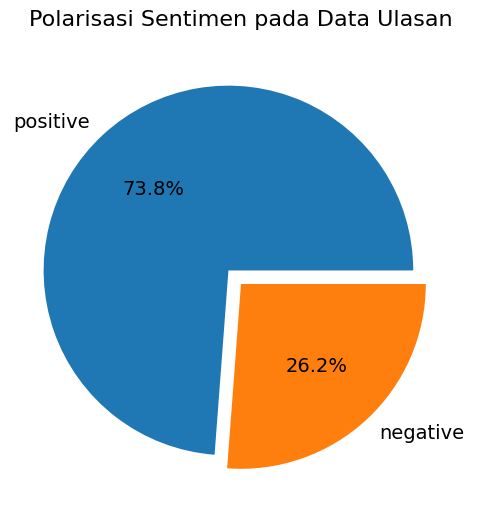

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Polarisasi Sentimen pada Data Ulasan', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

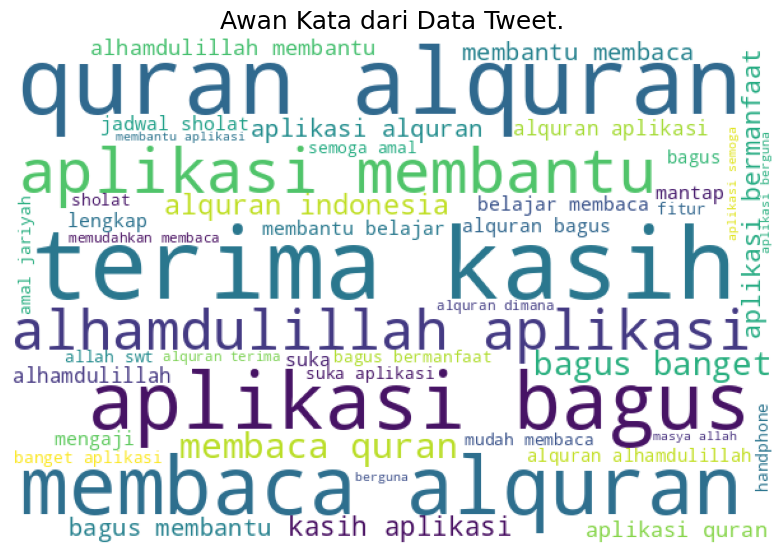

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Awan Kata dari Data Tweet.', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

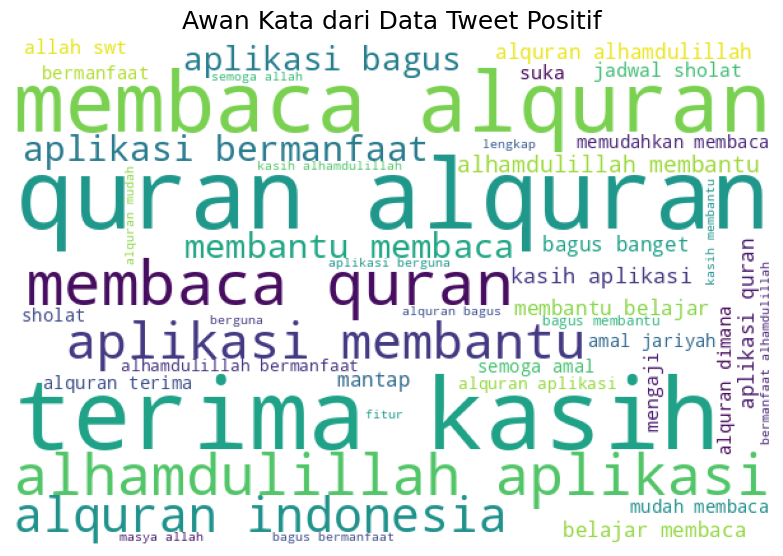

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Awan Kata dari Data Tweet Positif', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

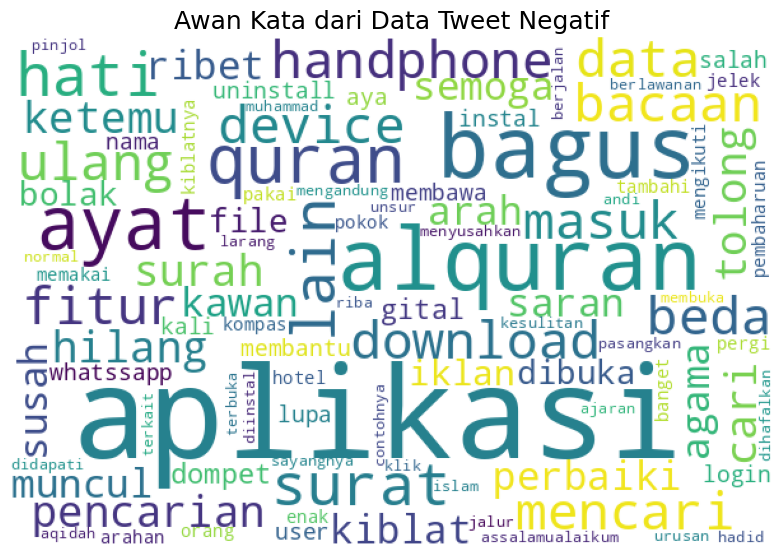

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Awan Kata dari Data Tweet Negatif', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

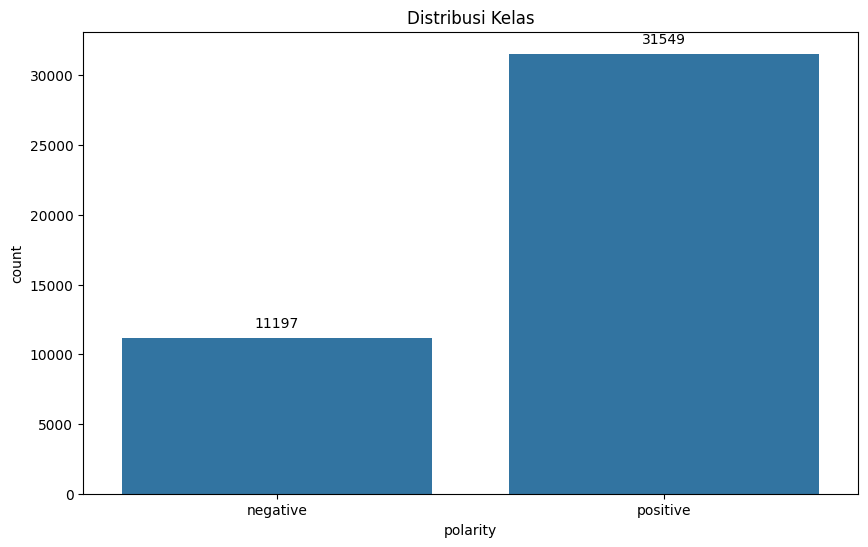

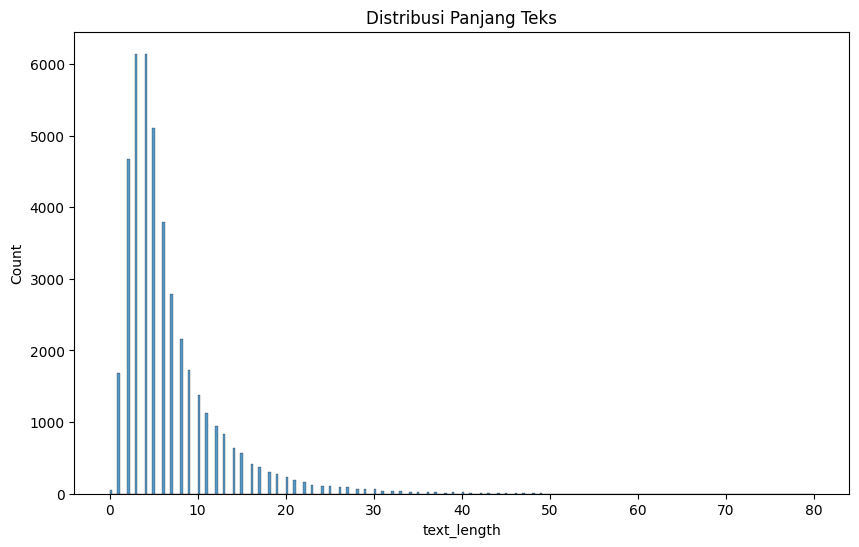

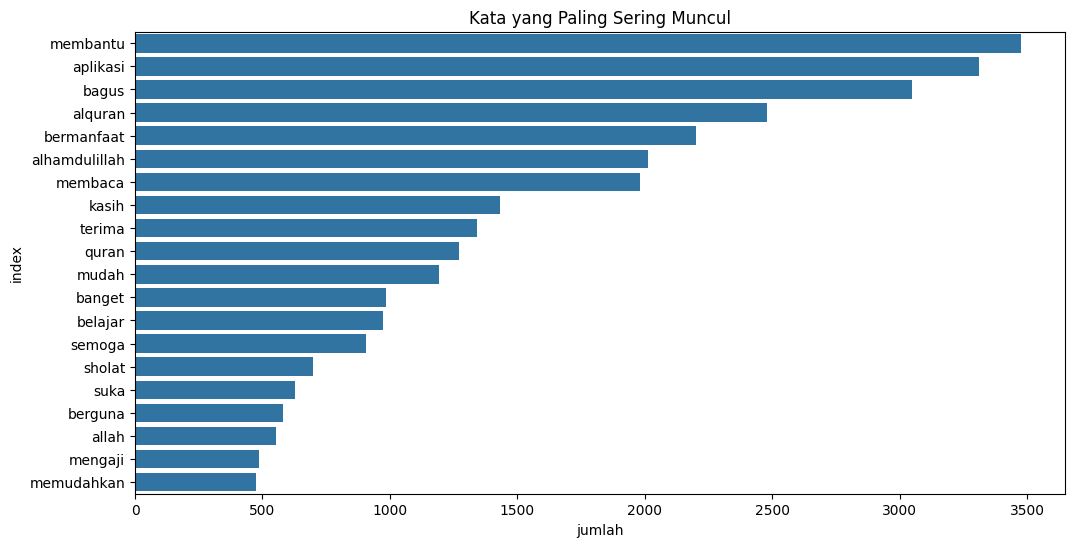

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata yang Paling Sering Muncul')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# **Data Splitting**

In [ ]:
clean_df.head(30)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,a72320e9-7ca4-4452-a7c5-ea7bd9ad3430,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasinya sudah bagus banget! Cuman gatau ngapa HP ku gabisa liat arah kiblat, jadinya repot deh. Padahal sudah nyalain lokasi, putar-putar HP, pindah-pindah lokasi, internet pun lancar cuman tetap gak bisa... jadi ya plis diperbaikin yah bang developer🙏",5,329,3.0.18,2025-01-02 04:03:10,"Assalamu'alaikum,\nTerima kasih telah menggunakan aplikasi ini dan memberikan rating positif di Google Play. Semoga Allah selalu memberkati dan melindungi Anda.\nSalam.\n",2025-01-02 05:01:06,3.0.18,Aplikasinya sudah bagus banget Cuman gatau ngapa HP ku gabisa liat arah kiblat jadinya repot deh Padahal sudah nyalain lokasi putarputar HP pindahpindah lokasi internet pun lancar cuman tetap gak bisa jadi ya plis diperbaikin yah bang developer,aplikasinya sudah bagus banget cuman gatau ngapa hp ku gabisa liat arah kiblat jadinya repot deh padahal sudah nyalain lokasi putarputar hp pindahpindah lokasi internet pun lancar cuman tetap gak bisa jadi ya plis diperbaikin yah bang developer,aplikasi sudah bagus banget hanya tidak tahu mengapa handphone ku tidak bisa lihat arah kiblat jadinya repot deh padahal sudah menyalakan lokasi memutar handphone memindah lokasi internet pun lancar hanya tetap gak bisa jadi iya tolong diperbaiki yah bang developer,"[aplikasi, sudah, bagus, banget, hanya, tidak, tahu, mengapa, handphone, ku, tidak, bisa, lihat, arah, kiblat, jadinya, repot, deh, padahal, sudah, menyalakan, lokasi, memutar, handphone, memindah, lokasi, internet, pun, lancar, hanya, tetap, gak, bisa, jadi, iya, tolong, diperbaiki, yah, bang, developer]","[aplikasi, bagus, banget, handphone, lihat, arah, kiblat, repot, menyalakan, lokasi, memutar, handphone, memindah, lokasi, internet, lancar, tolong, diperbaiki, developer]",aplikasi bagus banget handphone lihat arah kiblat repot menyalakan lokasi memutar handphone memindah lokasi internet lancar tolong diperbaiki developer,-11,negative,19
2,ea785bf1-3cff-452e-be02-c92600613625,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Maaf. Akhir-akhir ini jadual sholat otomatis maupun manual tidak berfungsil dengan baik. Dan letak wilayahpun demikian belum berfungsi dengan baik. Saya set otomatis hasilnya=Pasarkemis. Saya set manual hasilnya=Sepatan. Padahal titiknya sudah di pindah ke titik kelurahan Kutabaru, Tangerang. 😀😀😀👍👍👍",2,20,3.0.18,2025-01-19 05:05:27,"Assalamu'alaikum, Edsar.\nTerima kasih sudah menggunakan aplikasi ini untuk menemani ibadah Anda dan memberikan positif rating di Google Play. Barakallah.\nSalam.",2024-03-02 11:08:28,3.0.18,Maaf Akhirakhir ini jadual sholat otomatis maupun manual tidak berfungsil dengan baik Dan letak wilayahpun demikian belum berfungsi dengan baik Saya set otomatis hasilnyaPasarkemis Saya set manual hasilnyaSepatan Padahal titiknya sudah di pindah ke titik kelurahan Kutabaru Tangerang,maaf akhirakhir ini jadual sholat otomatis maupun manual tidak berfungsil dengan baik dan letak wilayahpun demikian belum berfungsi dengan baik saya set otomatis hasilnyapasarkemis saya set manual hasilnyasepatan padahal titiknya sudah di pindah ke titik kelurahan kutabaru tangerang,maaf akhirakhir ini jadwal sholat otomatis maupun manual tidak berfungsi dengan baik dan letak wilayah pun demikian belum berfungsi dengan baik saya pengaturan otomatis hasilnyapasarkemis saya pengaturan manual hasilnyasepatan padahal titiknya sudah di pindah ke titik kelurahan kutabaru tangerang,"[maaf, akhirakhir, ini, jadwal, sholat, otomatis, maupun, manual, tidak, berfungsi, dengan, baik, dan, letak, w

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,adzan,adzannya,akhirat,alarm,alhamdulillah,allah,alquran,amal,amin,...,tinggal,tingkatkan,tolong,tulisan,umat,update,wajib,warahmatullahi,warna,wb
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.276587,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.093727,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.268895,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.186057,0.0,0.0,...,0.264386,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.572779,0.0,0.0,0.0,0.000000,0.000000,0.093271,0.0,0.0,...,0.000000,0.0,0.425721,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
42742,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
42743,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
42744,0.0,0.000000,0.0,0.0,0.0,0.761461,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Algoritma Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8859808164697626
Naive Bayes - accuracy_test: 0.883859649122807


## **Algoritma Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9841501930050298
Random Forest - accuracy_test: 0.9160233918128655


## **Algoritma Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9434729208094514
Logistic Regression - accuracy_test: 0.9387134502923976


## **Algoritma Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9841501930050298
Decision Tree - accuracy_test: 0.8891228070175439


In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.883860
1        Random Forest       0.916023
2  Logistic Regression       0.938713
3        Decision Tree       0.889123


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.938713
1        Random Forest       0.916023
3        Decision Tree       0.889123
0          Naive Bayes       0.883860


In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: sangat membantu terimakasih
Sentimen kalimat baru adalah POSITIF.


In [40]:
!pip freeze > requirements.txt